## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
! git clone https://www.github.com/DS3001/assignment3

fatal: destination path 'assignment3' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [169]:
# Q1 Loading the data:
import pandas as pd
import numpy as np
df_car = pd.read_csv('/content/assignment3/data/car_data.csv')

print(df_car)

     User ID  Gender  Age  AnnualSalary  Purchased
0        385    Male   35         20000          0
1        681    Male   40         43500          0
2        353    Male   49         74000          0
3        895    Male   40        107500          1
4        661    Male   25         79000          0
..       ...     ...  ...           ...        ...
995      863    Male   38         59000          0
996      800  Female   47         23500          0
997      407  Female   28        138500          1
998      299  Female   48        134000          1
999      687  Female   44         73500          0

[1000 rows x 5 columns]


In [170]:
# Q1 cont.
df_car.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [171]:
# Q1.2 Summarising the variables:

# UserID variable:
# Seeing if there are any missing values
print(df_car['User ID'].isnull().values.any())
# no missing values

# Gender variable:
# Seeing if there are any missing values
print(df_car['User ID'].isnull().values.any())
# No missing values

# Age Variable:
# Seeing if there are any missing values
print(df_car['Age'].isnull().values.any())
# no missing values

# Annual Salary variable
# seeing if there are any missing values
print(df_car['AnnualSalary'].isnull().values.any())
# no missing values

# Purchased variable
# seeing if there are any missing values
print(df_car['Purchased'].isnull().values.any())
# no missing values

False
False
False
False
False


In [172]:
# Q1.2 cont: converting the gender from categorical into dummy variable so that 0 is for male and 1 is for female
import pandas as pd

df_car["Gender_dummy"] = df_car['Gender'].replace(['Male','Female'],[0,1])
print(df_car)



     User ID  Gender  Age  AnnualSalary  Purchased  Gender_dummy
0        385    Male   35         20000          0             0
1        681    Male   40         43500          0             0
2        353    Male   49         74000          0             0
3        895    Male   40        107500          1             0
4        661    Male   25         79000          0             0
..       ...     ...  ...           ...        ...           ...
995      863    Male   38         59000          0             0
996      800  Female   47         23500          0             1
997      407  Female   28        138500          1             1
998      299  Female   48        134000          1             1
999      687  Female   44         73500          0             1

[1000 rows x 6 columns]


In [173]:
# Q1.2 cont: Matrix X of predictors including Age and Annual Salary with the outcome y equaling Purchase

vars = ['Age', 'AnnualSalary']
X = df_car.loc[:,vars]
y = df_car['Purchased']
X.head()

,Age,AnnualSalary
0,35,20000
1,40,43500
2,49,74000
3,40,107500
4,25,79000


In [174]:
# Q1.3: MaxMin-normalize Age and AnnualSalary in X

def maxmin(X):
    X = (X-min(X))/(max(X)-min(X))
    return(X)

# Applying the maxmin- normalize to all the columns X
X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [175]:
# Q1.4: Split the sample into a ~80% training dataset and a ~20% testing dataset

# what it does:
# train_test_split is the tool that takes the data (X- info we have,Y- what is gonna be predicted) and divides it into two parts:
# teach the machine and test it
# test_sie-.2 means: use 20% of the data to test
# random_state=100 means: seed that makes sure that the data is split into the same way everytime
# x_train - info to train the machine
# x_test - info used to test the machine
# y_train- correct answers for the teaching
# y_test- correct answers for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

[ 8 10 14]


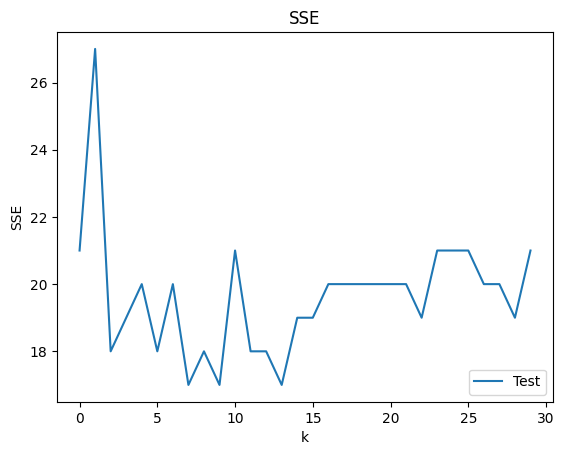

In [176]:
# Q1.5: Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser.
# Use sklearn to determine the optimal number of neighbors  𝑘  to use.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # importing the knn classifier tool

k_bar = 30 # k_bar is the upper limit of the range of k values,
k_grid = np.arange(1,k_bar) # max would be k_bar -1 = 29 because of the np.arrange(1, k_bar) that creates an array starting from 1 up to but not including k_bar
# setting up and executing a procedure to evalute the performance of the knn classifier ove ra range of 'k' values from 1 to k_bar -1.
SSE = np.zeros(k_bar)  # "SSE" array that will store the sum of sqaured errros for each value of k from 1 to k_bar (30)
for k in range(k_bar): # loop to repeat each value from 0 to 29 and this loop will be used to determine the number of neighbours
  model = KNeighborsClassifier(n_neighbors=k+1) # start the model; it will start with k being 0 but that's not valid so we do k+1 which will be 1
  fitted_model = model.fit(X_train, y_train) # trained model for using training data (X) and the target values (Y)
  y_hat = fitted_model.predict(X_test) # after the model is trained, y_hat is assigned to predict the training/ test  data
  SSE[k] = np.sum( (y_test-y_hat)**2 ) # calculate the sum of squared errors for the current value of k ( differnce between the true target and the predicted one) and then squared
# end of this loop, we will have the sum of swaured errors for each value from 1-29 ( k to k_bar )
#finding the sum of sqaured errors for different values of k in the knn

SSE_min = np.min(SSE) # find the smallest sum of squared errors
min_index = np.where(SSE==SSE_min) # find where is the min value
k_star = k_grid[min_index] # find which value from the k_grid corresponds to the smallest sse value
print(k_star) # print the k value that corresponds with the lowest sse

plt.plot(np.arange(0,k_bar),SSE,label='Test') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')
plt.title('SSE')
plt.show()

# k is the number of neighbours to consider
# actual neighbours are points from the training dataset
# when we have k =5, means that we consider 5 of the actual neighbour points from the training dataset
# k_grid= list of numbers from 1-29

In [177]:
# Q1.6: Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a confusion matrix.
# How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

model = KNeighborsClassifier(n_neighbors=8)

pd.crosstab(y_test, y_hat) # create a table that shows the relationship between the purchasers and the non- purchashers

# The majority of time the cases are predicted correctly; 0's go to 0's and 1's go to 1's. There is 13 times where 0 went to 1 and 4 times were 1 went to 0 which is 17/200 = 0.085.
# Overall accuracy is 183/200= 0.91 proportion of the cases.

col_0,0,1
Purchased,,
0,104,15
1,6,75


In [178]:
# Q1.7: Confusion matrices for men and women separately:

# resplit the data (said separately)
from sklearn.model_selection import train_test_split
vars= ['Age','AnnualSalary', 'Gender'] # split the age, annual salary, and gender vartiables
X= df_car.loc[:,vars] # X is assigned the age, annual salary, and gender columns
y = df_car['Purchased'] # y is assigned the purchased column ( target variable)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=100) # split the data into training and testing sets

# model
model = KNeighborsClassifier(n_neighbors=8) # create a new knn classifier that will look at the 8 closest data points
fitted_model= model.fit(X_train.drop('Gender', axis=1), y_train) # drop gender so then the model will use age and annual salary
y_hat = fitted_model.predict(X_test.drop('Gender', axis=1)) # y_hat is assigned the predicted values

# seperate the predicted and actual values based on gender
y_hat_M = y_hat[X_test['Gender']=='Male'] # predictions for male
y_hat_F = y_hat[X_test['Gender']=='Female'] # predictions for female
y_m = y_test[X_test['Gender']=='Male'] # actual values for male
y_f = y_test[X_test['Gender']=='Female'] # actual values for female

In [179]:
#Q1.7 cont:  crosstub for the relationship between actual female and predicted female values
import pandas as pd
pd.crosstab(y_f, y_hat_F)


col_0,0,1
Purchased,,
0,61,6
1,6,32


In [180]:
# Q1.7cont: Crosstub for the relationship between actual male and predicted male values
import pandas as pd
pd.crosstab(y_m, y_hat_M)

col_0,0,1
Purchased,,
0,48,4
1,18,25


In [181]:
# Model accurate predictions for female: 93/105 = 0.88
# Model accurate predictions for male: 73/95 = 0.76
# This means that the model does a better job predicting what a female customer will do than a male customer.

In [ ]:
# SEPARATOR BETWEEN QUESTION 1 AND QUESTION 2

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [182]:
# Q2.1: loading the data
import pandas as pd
df = pd.read_csv('/content/assignment3/data/USA_cars_datasets.csv')
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [183]:
# Q2.1 cont: Drop everything but price, year, and milage
df.columns

df = df.drop(columns=['Unnamed: 0', 'brand', 'model', 'title_status', 'color', 'vin', 'lot', 'state', 'country', 'condition'])


In [184]:
# Q2.1 cont: Seeing if the dropping worked:
df.head()


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [185]:
# Q2.1 checking the dimensions:
print(df.shape)
# seeing if there are any nas:
print(df.isnull().values.any())

(2499, 3)
False


In [186]:
# Q2.2: Maxmin normalize year and mileage
y = df['price']
X = df.loc[:,['year','mileage']]
(X.head())
(X.describe())

# Maxmin normalization function:
def maxmin(X):
    X = (X-min(X))/(max(X)-min(X))
    return(X)
X.head()

,year,mileage
0,2008,274117
1,2011,190552
2,2018,39590
3,2014,64146
4,2018,6654


In [187]:
# changing the names so it doesnt get confused with Question 1
X_train_2 = df
X_test_2 = df
y_train_2 = df
y_test_2 = df

In [188]:
# Q2.3: Split the sample into a ~80% training dataset and a ~20% testing dataset
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=.2,random_state=100)

In [189]:
# Q2.4: Use the 𝑘 NN algorithm for regression and the training data to predict price using year and mileage for the test set for  𝑘=3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

k_value = 3

model=KNeighborsRegressor(n_neighbors=k_value) # make the regression model with 3 being the k value
fitted_model = model.fit(X_train_2, y_train_2) # trains the model using the training data (X_train_2) and the target values( y_train_2)
y_hat = fitted_model.predict(X_test_2)# use the mdoel to predict the target values for the X_test_2 data


SSE=np.sum((y_test_2-y_hat)**2) # computues the sse
print(SSE)
# a price of 63 billion might not be the best fit since the price is in the 20 thousands

63892630628.44444


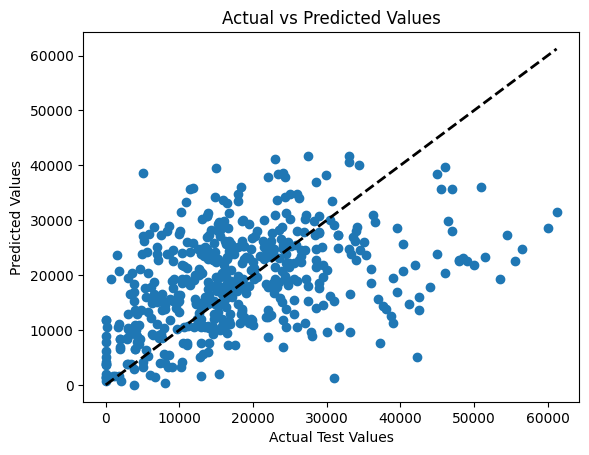

In [190]:
# K=3 plot

plt.scatter(y_test_2, y_hat)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
max_val = max(y_test_2.max(), y_hat.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2)
plt.show()
# y_hat is the predicted values- come from the year and mileage variables
# y_test_2 has the actual car prices ( actual test values)



In [28]:
# k value 10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

k_value = 10

model=KNeighborsRegressor(n_neighbors=k_value)
fitted_model = model.fit(X_train_2, y_train_2)
y_hat = fitted_model.predict(X_test_2)


SSE=np.sum((y_test_2-y_hat)**2) # computues the sse
print(SSE)




52585303073.590004


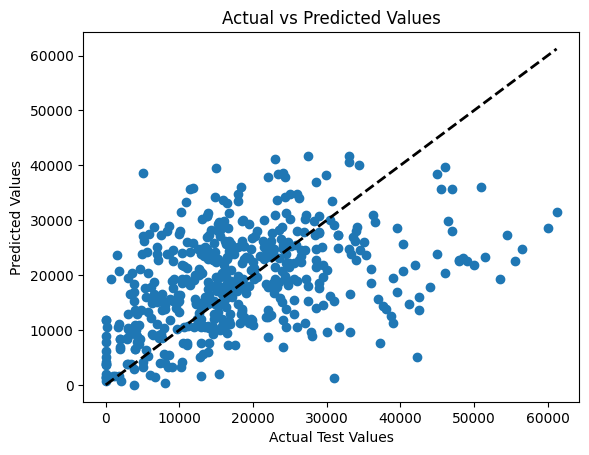

In [191]:
# k =10 Plot

plt.scatter(y_test_2, y_hat)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
max_val = max(y_test_2.max(), y_hat.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2)
plt.show()


In [192]:
# K value = 25
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

k_value = 25

model=KNeighborsRegressor(n_neighbors=k_value)
fitted_model = model.fit(X_train_2, y_train_2)
y_hat = fitted_model.predict(X_test_2)


SSE=np.sum((y_test_2-y_hat)**2)
print(SSE)

53161647868.3584


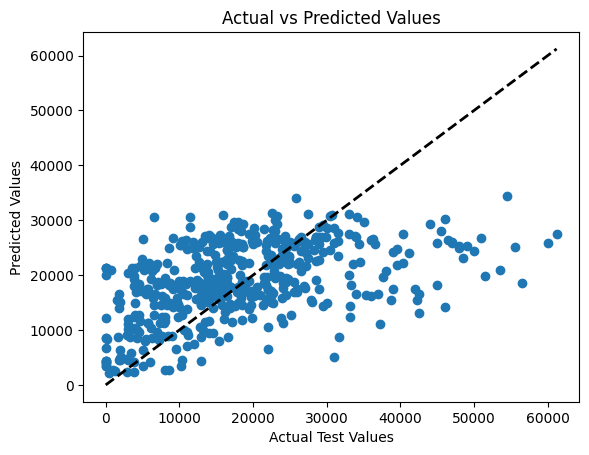

In [193]:
# k=25 Plot
plt.scatter(y_test_2, y_hat)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
max_val = max(y_test_2.max(), y_hat.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2)
plt.show()

In [194]:
# K value = 50
k_value = 50

model=KNeighborsRegressor(n_neighbors=k_value)
fitted_model = model.fit(X_train_2, y_train_2)
y_hat = fitted_model.predict(X_test_2)


SSE=np.sum((y_test_2-y_hat)**2)
print(SSE)

53721573131.0276


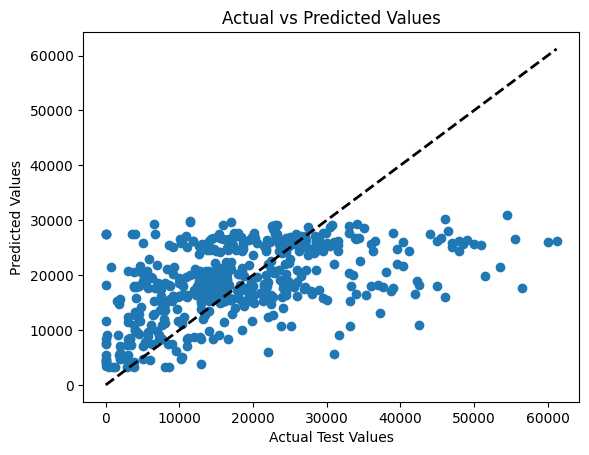

In [195]:
# k=50 Plot
plt.scatter(y_test_2, y_hat)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
max_val = max(y_test_2.max(), y_hat.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2)
plt.show()

In [196]:
# k value =100
k_value = 100

model=KNeighborsRegressor(n_neighbors=k_value)
fitted_model = model.fit(X_train_2, y_train_2)
y_hat = fitted_model.predict(X_test_2)


SSE=np.sum((y_test_2-y_hat)**2)
print(SSE)

52637155856.5107


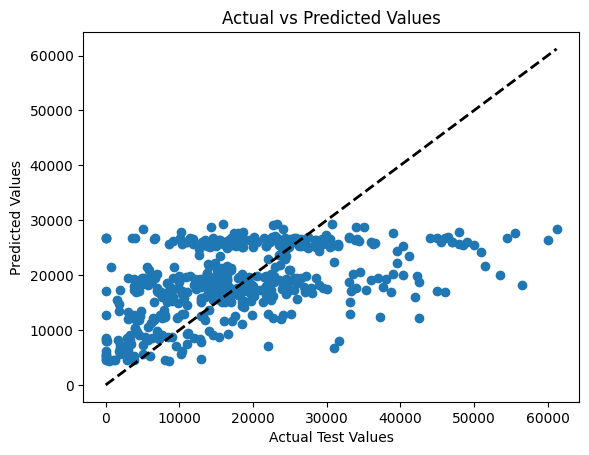

In [197]:
# k=100 Plot
plt.scatter(y_test_2, y_hat)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
max_val = max(y_test_2.max(), y_hat.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2)
plt.show()

In [198]:
# k value = 300
k_value = 300

model=KNeighborsRegressor(n_neighbors=k_value)
fitted_model = model.fit(X_train_2, y_train_2)
y_hat = fitted_model.predict(X_test_2)


SSE=np.sum((y_test_2-y_hat)**2)
print(SSE)

52650538124.84375


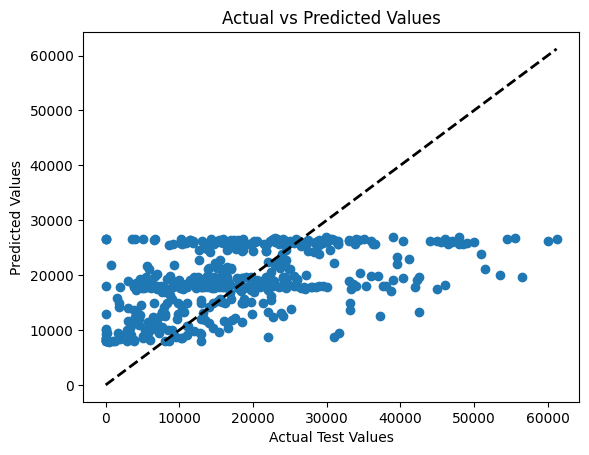

In [199]:
# k=300 Plot

plt.scatter(y_test_2, y_hat)
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
max_val = max(y_test_2.max(), y_hat.max())
plt.plot([0, max_val], [0, max_val], 'k--', lw=2)
plt.show()

# From the k increasing I see that k  = 25 is the same as k = 100 and all the others are different. This could mean a level of consistency for the target variable.
# Another pattern is that the SSEs for 10-300 are very similar could mean stability for the values.

In [200]:
# Q2.5: Find the optimal k

k_values = list(range(3, 300)) # range of the k values

sse_values = [] # SSE list to store each k value

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k) # starts the model
    fitted_model = model.fit(X_train_2, y_train_2) # use the values from the x_train_2 against the y_train 2
    y_hat = fitted_model.predict(X_test_2) # predict and store  the target values in y_hat
    SSE = np.sum((y_test_2 - y_hat)**2) # find the SSE
    sse_values.append(SSE) # store it back to the sse_values list

    optimal_k = k_values[sse_values.index(min(sse_values))]
print(optimal_k)

12


In [201]:
# Q2.6: What happened in the plots of predicted versus actual prices as  𝑘  varied
# Because most of the  plots are different from each other it reflects the overfitting of the smaller values ( because of the diff plot) and then as the k values grow, it becomes underfitted since the patterns in the data are not captured; they are generalized

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [203]:
# Q6.1: Running the codes:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def createData(noise,N=50):
    np.random.seed(100)

    car_X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    car_X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    car_X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])

    cdf1 = pd.DataFrame({'x1':car_X1[0,:],'x2':car_X1[1,:],'group':'a'})
    cdf2 = pd.DataFrame({'x1':car_X2[0,:],'x2':car_X2[1,:],'group':'b'})
    cdf3 = pd.DataFrame({'x1':car_X3[0,:],'x2':car_X3[1,:],'group':'c'})
    ddf = pd.concat([cdf1,cdf2,cdf3],axis=0)
    return ddf

dcf0_125 = createData(0.125)
dcf0_25 = createData(0.25)
dcf0_5 = createData(0.5)
dcf1_0 = createData(1.0)
dcf2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

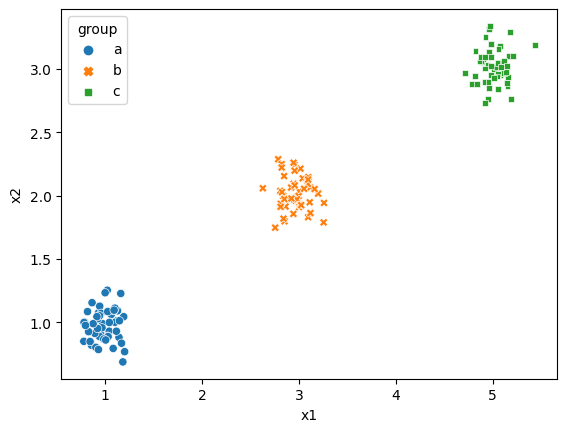

In [204]:
# Q6.2  Making the scatterplots:
import seaborn as sns
# 0_125 scatterplot
sns.scatterplot(data = dcf0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

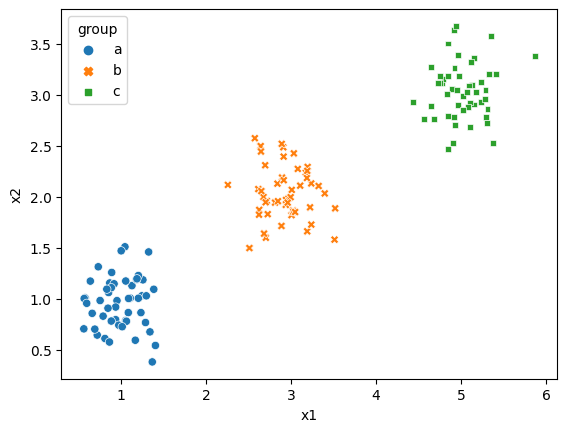

In [207]:
# 0_25 scatterplot:
sns.scatterplot(data = dcf0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

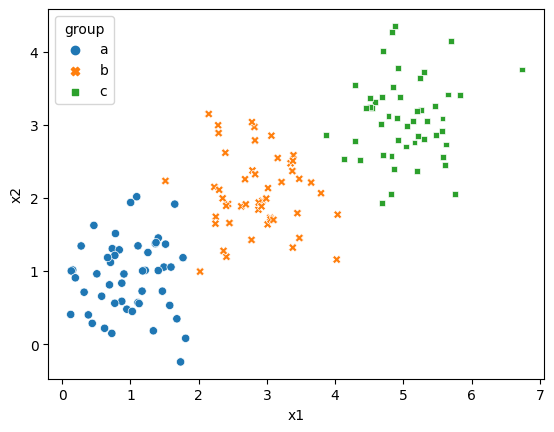

In [208]:
# 0_5 scatterplot:
sns.scatterplot(data = dcf0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

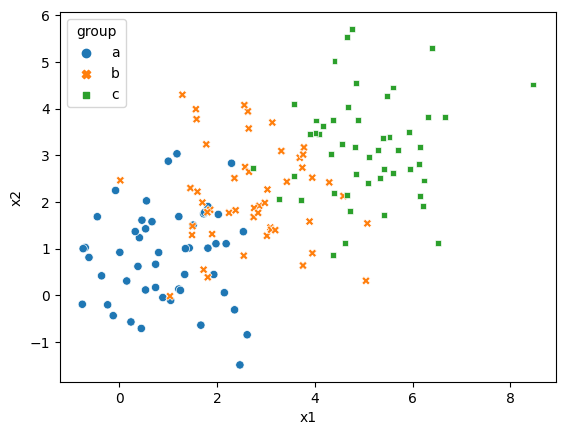

In [209]:
# 1 scatterplot:
sns.scatterplot(data = dcf1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

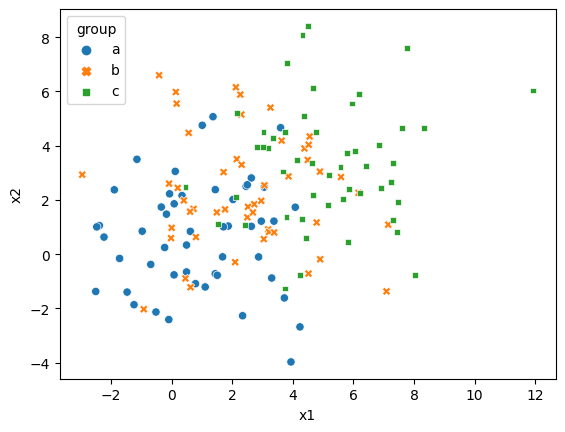

In [210]:
# 2 Scatterplot:
sns.scatterplot(data = dcf2_0, x = 'x1',y='x2',hue='group',style='group')
# The more noise, the more the points move out and hit each other and by the end, you can't really see whihc point is which.

In [211]:
#Q 6.3 Creating a scree plot for each of the datasets

def maxmin(x): # Max-min scaler function
  x = (x-min(x))/(max(x)-min(x))
  return x

def scree(data): # I built a function to make scree plots quickly
# Preprocess the data:
  X = data.loc[ : , ['x1','x2'] ] # Select data to cluster
  X = X.apply(maxmin) # Normalize the data

# Create a scree plot:
  k_bar = 15
  k_grid = np.arange(1,k_bar+1) # The range of k's to consider
  SSE = np.zeros(k_bar) # We'll store the training error here
  for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) #
    model = model.fit(X) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE
  scree_plot, axes = plt.subplots()
  sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
  axes.set_ylim(0,35)

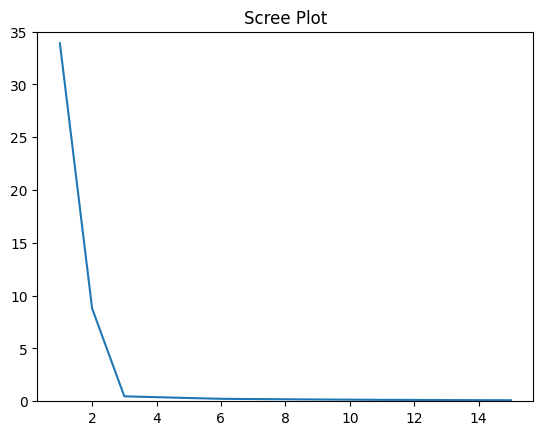

In [213]:
# Scree plot for 0_125:
scree(data=dcf0_125)
# elbow is at 3

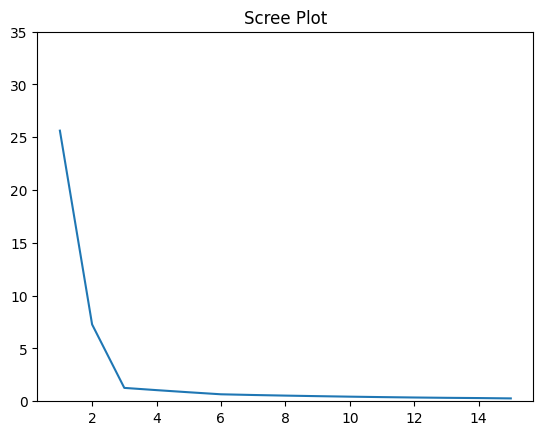

In [214]:
# Scree Plot for 0_25:
scree( data = dcf0_25 )
# elbow is at 3

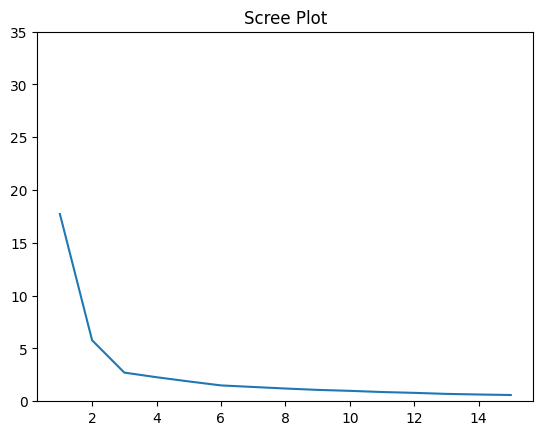

In [215]:
# Scree Plot for 0_5:
scree( data = dcf0_5 )
# elbow is at 3

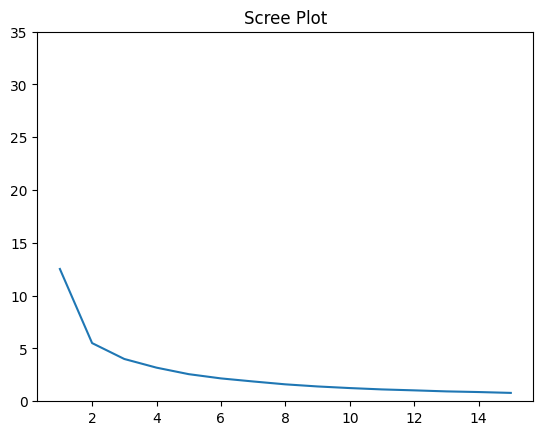

In [216]:
# Scree Plot for 1:
scree( data = dcf1_0 )
# elbow is at 2?

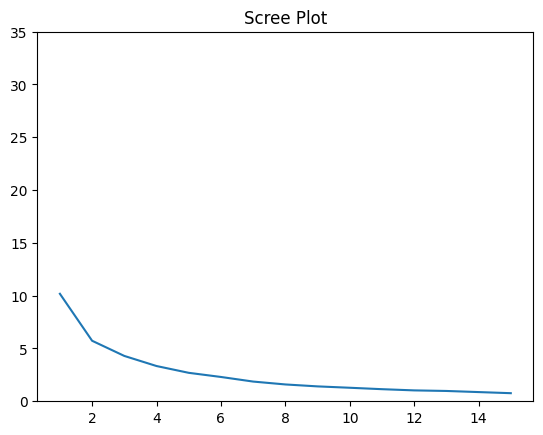

In [217]:
# Scree Plot for 2:
scree( data = dcf2_0 )
# hard to see elbow

In [218]:
# Q6.4: Explain the intuition of the elbow, using this numerical simulation as an example.

# A scree plot shows when the groups when they are separate but it's hard to show them when they are mixed with other groups. So if there is a bend the groups are separate and if the line is smooth they are mixed.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?